#### 模板匹配

#### 直方图(可以直接用plt)

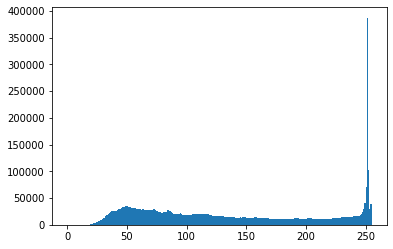

In [10]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('nannan1.png')
hist=cv2.calcHist([img],[0],None,[256],[0,256])

plt.hist(img.ravel(),256)
plt.show()

#### 均衡化

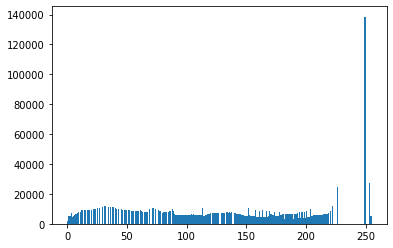

In [12]:
img=cv2.imread('nannan1.png',0)
nomal=cv2.equalizeHist(img)
plt.hist(nomal.ravel(),256)
plt.show()

In [15]:
import numpy as np
res=np.hstack((img,nomal))
cv2.imshow('img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### 傅里叶变化

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x217fc8ac910>)

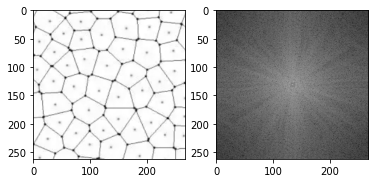

In [8]:
from sys import flags
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('taisen.png',0)
img_float32=np.float32(img)
dft=cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)

magnitude_spectrum=50*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')

#### 低频滤波

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x217fe7afe20>)

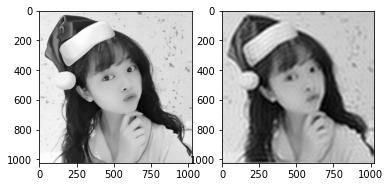

In [12]:
from sys import flags
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('nannan.png',0)
img_float32=np.float32(img)
dft=cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)

rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)

mask=np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]=1

fshift=dft_shift*mask
f_ishift=np.fft.ifftshift(fshift)
img_back=cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(img_back,cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x217fe54f700>)

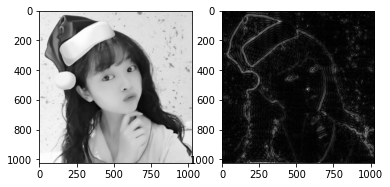

In [13]:
from sys import flags
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('nannan.png',0)
img_float32=np.float32(img)
dft=cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)

rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)

mask=np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]=0

fshift=dft_shift*mask
f_ishift=np.fft.ifftshift(fshift)
img_back=cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.subplot(122),plt.imshow(img_back,cmap='gray')